#RUL Estimation using LSTNet

In [3]:
from google.colab import files
# from dataPreprocessing import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import h5py
import time
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler


#Load the data given the file name [DS01,DS02,...,DS08]

def load_NCMAPSS_data(num):
    if num==1:
        filename = '/content/drive/MyDrive/Dataset/N-CMAPSS_DS01-005.h5'

    if num==2:
        filename = '/content/drive/MyDrive/Dataset/N-CMAPSS_DS02-006.h5'

    if num==3:
        filename = '/content/drive/MyDrive/Dataset/N-CMAPSS_DS03-012.h5'

    if num==4:
        filename = '/content/drive/MyDrive/Dataset/N-CMAPSS_DS04.h5'

    if num==5:
        filename = '/content/drive/MyDrive/Dataset/N-CMAPSS_DS05.h5'
        
    if num==6:
        filename = '/content/drive/MyDrive/Dataset/N-CMAPSS_DS06.h5'

    if num==7:
        filename = '/content/drive/MyDrive/Dataset/N-CMAPSS_DS07.h5'

    if num==8:
        filename = '/content/drive/MyDrive/Dataset/N-CMAPSS_DS08a-009.h5'

    # Load data
    with h5py.File(filename, 'r') as hdf:
        # Development set
        W_dev = np.array(hdf.get('W_dev'))             # W
        X_s_dev = np.array(hdf.get('X_s_dev'))         # X_s
        X_v_dev = np.array(hdf.get('X_v_dev'))         # X_v
        T_dev = np.array(hdf.get('T_dev'))             # T
        Y_dev = np.array(hdf.get('Y_dev'))             # RUL  
        A_dev = np.array(hdf.get('A_dev'))             # Auxiliary

        # Test set
        W_test = np.array(hdf.get('W_test'))           # W
        X_s_test = np.array(hdf.get('X_s_test'))       # X_s
        X_v_test = np.array(hdf.get('X_v_test'))       # X_v
        T_test = np.array(hdf.get('T_test'))           # T
        Y_test = np.array(hdf.get('Y_test'))           # RUL  
        A_test = np.array(hdf.get('A_test'))           # Auxiliary
        
        # Varnams
        W_var = np.array(hdf.get('W_var'))
        X_s_var = np.array(hdf.get('X_s_var'))  
        X_v_var = np.array(hdf.get('X_v_var')) 
        T_var = np.array(hdf.get('T_var'))
        A_var = np.array(hdf.get('A_var'))

        # from np.array to list dtype U4/U5
        W_var = list(np.array(W_var, dtype='U20'))
        X_s_var = list(np.array(X_s_var, dtype='U20'))  
        X_v_var = list(np.array(X_v_var, dtype='U20')) 
        T_var = list(np.array(T_var, dtype='U20'))
        A_var = list(np.array(A_var, dtype='U20'))


    train_data = DataFrame(data=np.concatenate((A_dev,X_s_dev,X_v_dev),axis=1),
                           columns=(A_var+X_s_var+X_v_var))

    test_data = DataFrame(data=np.concatenate((A_test,X_s_test,X_v_test),axis=1),
                          columns=(A_var+X_s_var+X_v_var))

    return (train_data,Y_dev),(test_data,Y_test)


#plotting sensors reading we took the mean of each cycle

def plot_senors_reading(data):
    # Extract the mean of the cylcles of each unit
    data_mean = DataFrame(columns=data.columns)
    n_units = data.unit.unique()

    for unit in n_units:
        unit_data = data[data.unit==unit]#Extract the the data of one unit
        t_eof = int(unit_data.cycle.max())
        cycle_mean = np.zeros((t_eof,unit_data.shape[1]))
        for c in range(t_eof):
            mean = np.array(unit_data[unit_data.cycle==c].mean(axis=0))
            mean = mean.reshape(1,unit_data.shape[1])
            cycle_mean[c] = mean # the mean of the measurments at the c-th cycle
        cycle_mean = DataFrame(data = cycle_mean,columns=data.columns)
        data_mean = pd.concat([data_mean,cycle_mean])
    data_mean.dropna(subset=data_mean.columns)
    data_mean.drop(0)


    
    #plotting
    col_list = data.columns[4:18]
            
    fig, ax = plt.subplots(ncols=7, nrows =2, figsize=(30, 10))
    ax = ax.ravel()
    for i, item in enumerate(col_list):
        data_mean.groupby('unit').plot(kind='line', x = "cycle", y = item, ax=ax[i])
        ax[i].get_legend().remove()
        ax[i].title.set_text(item)
    plt.subplots_adjust(top = 0.99, bottom = 0.01, hspace = 0.3, wspace = 0.2)
    plt.show()


def plot_virtual_senors_reading(data):
    # Extract the mean of the cylcles of each unit
    data_mean = DataFrame(columns=data.columns)
    n_units = data.unit.unique()

    for unit in n_units:
        unit_data = data[data.unit==unit]#Extract the the data of one unit
        t_eof = int(unit_data.cycle.max())
        cycle_mean = np.zeros((t_eof,unit_data.shape[1]))
        for c in range(t_eof):
            mean = np.array(unit_data[unit_data.cycle==c].mean(axis=0))
            mean = mean.reshape(1,unit_data.shape[1])
            cycle_mean[c] = mean # the mean of the measurments at the c-th cycle
        cycle_mean = DataFrame(data = cycle_mean,columns=data.columns)
        data_mean = pd.concat([data_mean,cycle_mean])
    data_mean.dropna(subset=data_mean.columns)
    data_mean.drop(0)


    
    #plotting
    col_list = data.columns[18:32]
            
    fig, ax = plt.subplots(ncols=7, nrows =2, figsize=(30, 10))
    ax = ax.ravel()
    for i, item in enumerate(col_list):
        data_mean.groupby('unit').plot(kind='line', x = "cycle", y = item, ax=ax[i])
        ax[i].get_legend().remove()
        ax[i].title.set_text(item)
    plt.subplots_adjust(top = 0.99, bottom = 0.01, hspace = 0.3, wspace = 0.2)
    plt.show()


def data_normalization(X_train,X_test):
    Scaler = StandardScaler()
    X_train.iloc[:,2:] =Scaler.fit_transform(X_train.iloc[:,2:])
    X_test.iloc[:,2:] =Scaler.transform(X_test.iloc[:,2:])

    return X_train,X_test


    


##Load N-CMAPSS Dataset

In [7]:
#X  will be in the form pandas DataFrame, and the target Y will be a numpy array
(X_train,y_train),(X_test,y_test) = load_NCMAPSS_data(8) # Change the number to load different files e.x DS02,DS03,...


In [8]:
#show samples of the data
X_train.head()

unit  cycle   Fc   hs         T24          T30          T48          T50  \
0   1.0    1.0  1.0  1.0  632.830608  1525.667253  1953.949543  1319.505339   
1   1.0    1.0  1.0  1.0  632.859504  1525.696748  1953.927850  1319.441504   
2   1.0    1.0  1.0  1.0  632.889882  1525.725093  1953.948358  1319.424113   
3   1.0    1.0  1.0  1.0  632.920333  1525.759185  1953.952618  1319.375074   
4   1.0    1.0  1.0  1.0  632.956016  1525.785508  1953.952454  1319.329057   

         P15         P2  ...         W22         W25        W31        W32  \
0  20.431550  14.614995  ...  297.155803  297.152426  34.609880  20.765928   
1  20.433361  14.616348  ...  297.168238  297.165520  34.611427  20.766856   
2  20.435964  14.618606  ...  297.183596  297.181313  34.613293  20.767976   
3  20.437438  14.619858  ...  297.190911  297.187731  34.614051  20.768430   
4  20.440027  14.622166  ...  297.200890  297.198232  34.615291  20.769175   

          W48         W50      SmFan      SmLPC      SmHPC        phi  
0  282.413502  298.756679  15.355652  10.502229  24.031103  44.382600  
1  282.426011  298.770010  15.362718  10.497703  24.034327  44.380758  
2  282.441066  298.785912  15.370152  10.492989  24.036347  44.380697  
3  282.447355  298.792520  15.379321  10.488816  24.038863  44.379708  
4  282.457126  298.802889  15.388950  10.482465  24.042040  44.378914  

[5 rows x 32 columns]

##Plot the Senors measurments

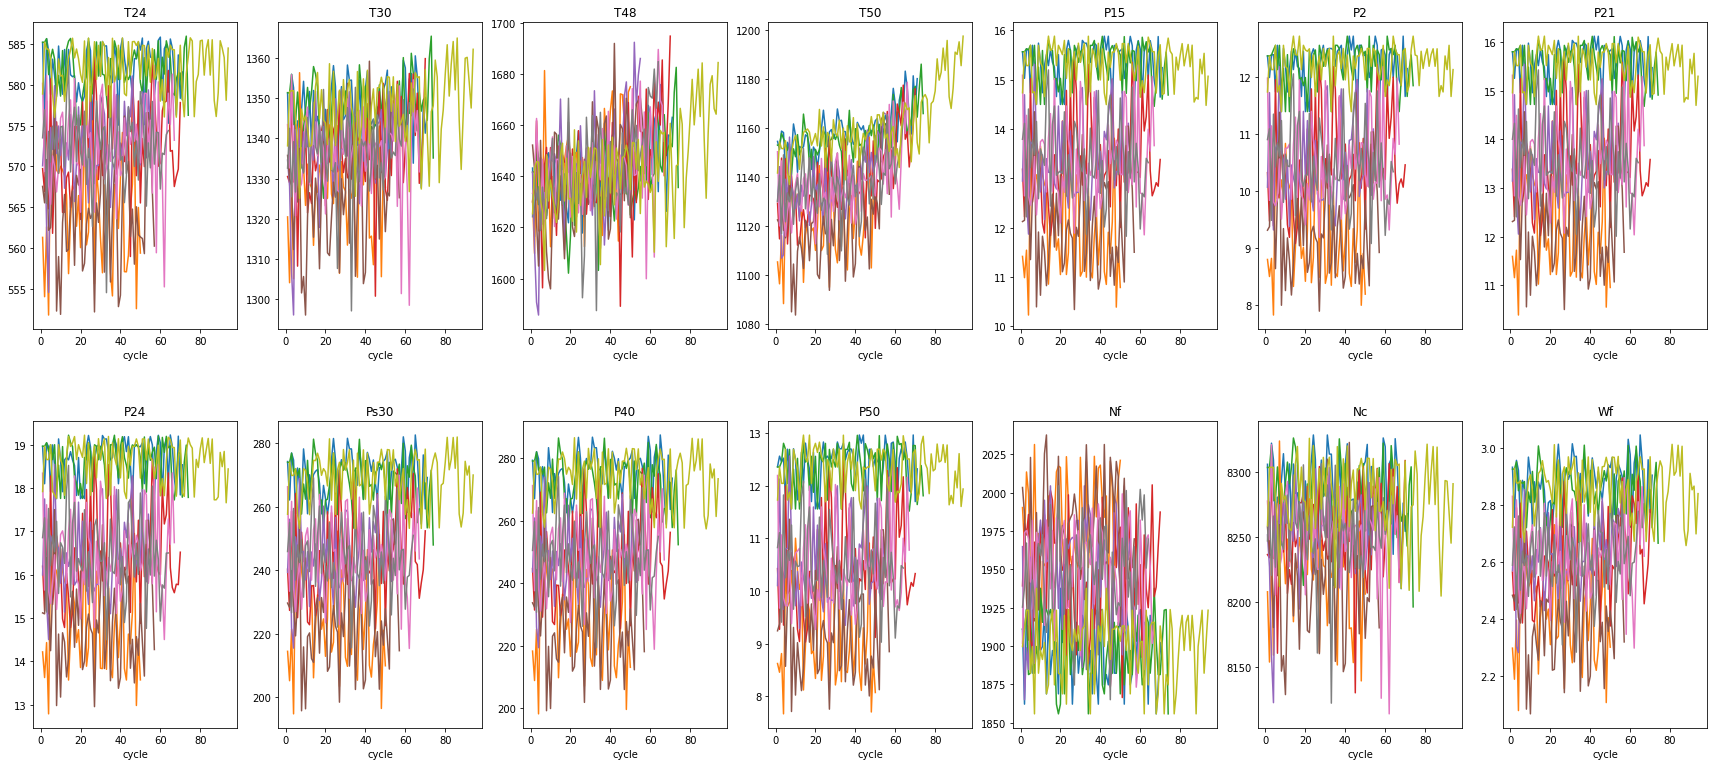

In [9]:
#Actual Sensor measurments
plot_senors_reading(X_train)

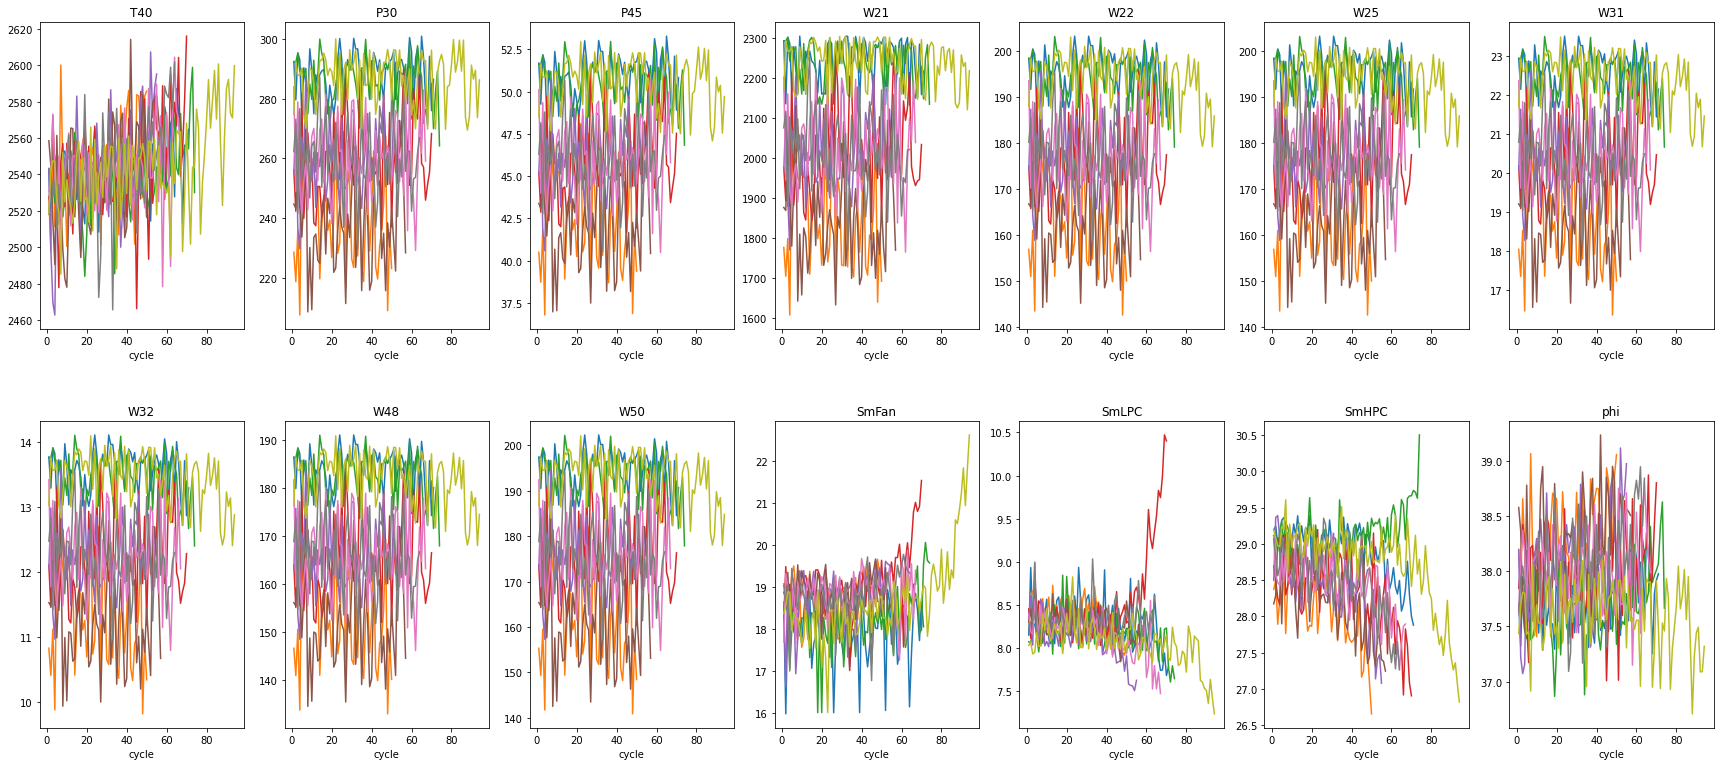

In [10]:
#Virtual Sensors measurments
plot_virtual_senors_reading(X_train)

##Normalize the data and Visualize it

In [11]:
X_train_normalized,X_test_normalized = data_normalization(X_train,X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


In [12]:
X_train_normalized.head()

unit  cycle        Fc        hs       T24       T30       T48       T50  \
0   1.0    1.0 -1.518773  1.482991  2.953605  2.721079  2.440138  2.897629   
1   1.0    1.0 -1.518773  1.482991  2.954997  2.721501  2.439968  2.896618   
2   1.0    1.0 -1.518773  1.482991  2.956460  2.721907  2.440129  2.896343   
3   1.0    1.0 -1.518773  1.482991  2.957927  2.722395  2.440162  2.895566   
4   1.0    1.0 -1.518773  1.482991  2.959645  2.722772  2.440161  2.894838   

        P15        P2  ...       W22       W25       W31       W32       W48  \
0  2.595964  1.825301  ...  3.376588  3.376526  3.376526  3.376526  3.387152   
1  2.596622  1.825887  ...  3.376933  3.376890  3.376890  3.376890  3.387511   
2  2.597567  1.826866  ...  3.377359  3.377328  3.377328  3.377328  3.387943   
3  2.598102  1.827408  ...  3.377562  3.377506  3.377506  3.377506  3.388124   
4  2.599042  1.828408  ...  3.377839  3.377797  3.377797  3.377797  3.388404   

        W50     SmFan     SmLPC     SmHPC       phi  
0  3.386578 -1.671325  2.142986 -1.734764  2.164949  
1  3.386940 -1.667848  2.138623 -1.733482  2.164317  
2  3.387372 -1.664190  2.134080 -1.732679  2.164296  
3  3.387552 -1.659678  2.130058 -1.731678  2.163956  
4  3.387834 -1.654939  2.123936 -1.730415  2.163683  

[5 rows x 32 columns]

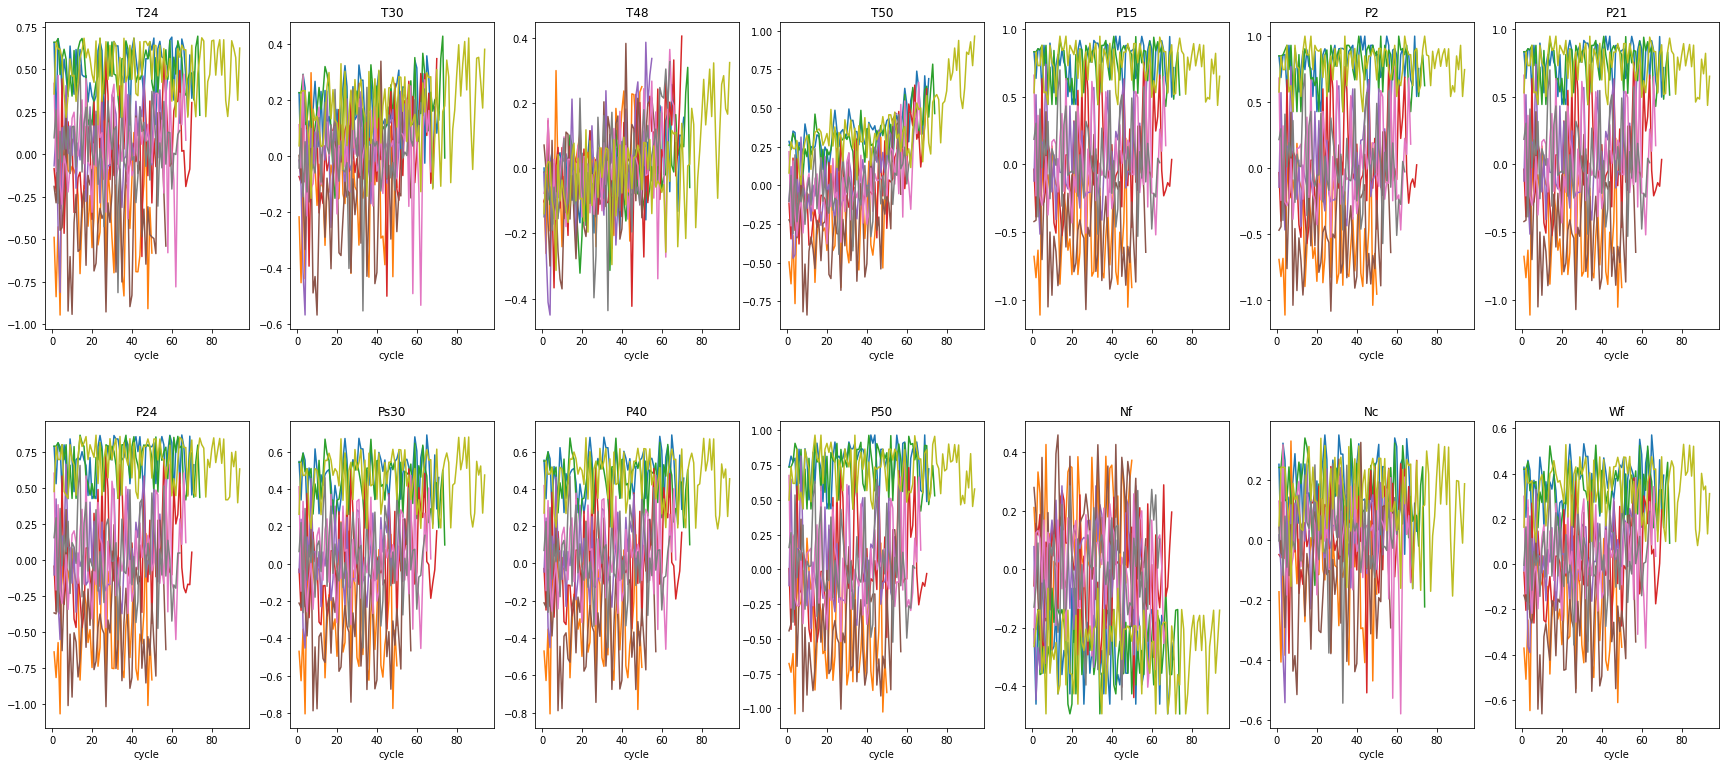

In [13]:
plot_senors_reading(X_train_normalized)

# Define Dataloader

In [38]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

'''
# training loop
for epoch in range(num_epochs):
    # loop over all batches
    for i in range(total_batches):
        batch_x, batch_y = ...
'''

# epoch = one forward and backward pass of ALL training samples
# batch_size = number of training samples used in one forward/backward pass
# number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of sampes
# e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch

# --> DataLoader can do the batch computation for us

# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class NCMAPPS(Dataset):

    def __init__(self,x,y):
        # Initialize data, download, etc.
        #X  will be in the form pandas DataFrame, and the target Y will be a numpy array
        
        self.x= x.to_numpy() # Convert to numpy array for easuer handling 
        self.y= y
        self.n_samples = x.shape[0]
        
    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x[index,:], self.y[index,:]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


# create dataset
dataset = NCMAPPS(X_train,y_train)
batch_size= 1000
# print(X_train.iloc[[100]])
# Load whole dataset with DataLoader
train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True)


# Dummy Training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/batch_size)
# print(total_samples, n_iterations)
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        
        
        # Run your training process
        if (i+1) % 500 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')






Epoch: 1/2, Step 500/4886| Inputs torch.Size([1000, 32]) | Labels torch.Size([1000, 1])
Epoch: 1/2, Step 1000/4886| Inputs torch.Size([1000, 32]) | Labels torch.Size([1000, 1])
Epoch: 1/2, Step 1500/4886| Inputs torch.Size([1000, 32]) | Labels torch.Size([1000, 1])
Epoch: 1/2, Step 2000/4886| Inputs torch.Size([1000, 32]) | Labels torch.Size([1000, 1])
Epoch: 1/2, Step 2500/4886| Inputs torch.Size([1000, 32]) | Labels torch.Size([1000, 1])
Epoch: 1/2, Step 3000/4886| Inputs torch.Size([1000, 32]) | Labels torch.Size([1000, 1])
Epoch: 1/2, Step 3500/4886| Inputs torch.Size([1000, 32]) | Labels torch.Size([1000, 1])
Epoch: 1/2, Step 4000/4886| Inputs torch.Size([1000, 32]) | Labels torch.Size([1000, 1])
Epoch: 1/2, Step 4500/4886| Inputs torch.Size([1000, 32]) | Labels torch.Size([1000, 1])
Epoch: 2/2, Step 500/4886| Inputs torch.Size([1000, 32]) | Labels torch.Size([1000, 1])
Epoch: 2/2, Step 1000/4886| Inputs torch.Size([1000, 32]) | Labels torch.Size([1000, 1])
Epoch: 2/2, Step 1500/4